In [ ]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [ ]:
Nws_Fke = Nws_Fkepnn.read_csv('purr_FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
793,turkish bombardment kills civilians syria turk...,1
794,martyrs terrorists shell aleppos salah eddin s...,1
795,chemical attack kills five syrians aleppo sana...,0
796,killed russian military chopper shot syria fiv...,1


In [ ]:
Nws_Fke['labels'].value_counts()

1    423
0    375
Name: labels, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as Nws_Fkecnv

Nws_Fke_anl = Nws_Fkecnv(analyzer='char', ngram_range= (1,1))
Nws_Fke_x = Nws_Fke_anl.fit_transform(Nws_Fke['article_content'].values.astype('U')).toarray()

In [ ]:
print(Nws_Fke_x)

[[221 153  14 ...   5  32   1]
 [215 149  25 ...   0  29   6]
 [145  92  27 ...   1  21   0]
 ...
 [138  83  11 ...   2  17   2]
 [138  60  10 ...   2  26   1]
 [264 185  22 ...   3  34   9]]


In [ ]:
Nws_Fke_y = Nws_Fke['labels']

In [ ]:
from imblearn.over_sampling import SMOTE as Nws_Fke_sme
from collections import Counter as Nws_Fke_cttr
print('Original Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))
Nws_Fke_MM = Nws_Fke_sme()
Nws_Fke_x, Nws_Fke_y = Nws_Fke_MM.fit_resample(Nws_Fke_x, Nws_Fke_y)
print('Resampled Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))


Original Nws_Fke datashape Counter({1: 423, 0: 375})
Resampled Nws_Fke datashape Counter({0: 423, 1: 423})


In [ ]:
Nws_Fke_x.shape

(846, 27)

In [ ]:
Nws_Fke_y.shape

(846,)

In [ ]:
from sklearn.model_selection import train_test_split as Nws_Fkennes

Nws_si =0.4
Nws_rs = 31
Nws_sii =0.5

In [ ]:
Nws_Fke_xN, Nws_Fke_xS, Nws_Fke_yN, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_x, Nws_Fke_y, test_size=Nws_si, random_state= Nws_rs)
Nws_Fke_xV, Nws_Fke_xS, Nws_Fke_yV, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_xS, Nws_Fke_yS, test_size= Nws_sii, random_state= Nws_rs)

print(Nws_Fke_xN.shape)
print(Nws_Fke_xV.shape)
print(Nws_Fke_xS.shape)

(507, 27)
(169, 27)
(170, 27)


### Voting classifier

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import classification_report as Nws_Fkeclc
from sklearn.metrics import confusion_matrix as Nws_Fkecos
from sklearn.metrics import ConfusionMatrixDisplay as Nws_Fkecud
from sklearn.model_selection import GridSearchCV as Nws_Fkegrs
import time as Nws_Fketme
from sklearn.ensemble import VotingClassifier as Nws_Fkevtc
import numpy as Nws_Fkenu
from sklearn.linear_model import LogisticRegression as Nws_Fkelst
from sklearn.linear_model import PassiveAggressiveClassifier as Nws_Fkepvag
from sklearn.svm import LinearSVC as Nws_Fkelisv
from xgboost import XGBClassifier as Nws_Fkexgrb
from lightgbm import LGBMClassifier as Nws_Fkeligb
from catboost import CatBoostClassifier as Nws_Fkecttb

#### Logistic Regression, Passive Aggressive Classifier & XGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelst(C=3.0,penalty='l2',solver='lbfgs')

Nws_Fke_Mdl2 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl3 = Nws_Fkexgrb(learning_rate=0.01,n_estimators=20,subsample=0.03)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[CV 1/2; 1/2] END ..................voting=hard;, score=0.640 total time=   0.4s
[CV 2/2; 1/2] START voting=hard.................................................
[CV 2/2; 1/2] END ..................voting=hard;, score=0.520 total time=   0.2s
[CV 1/2; 2/2] START voting=soft.................................................
[CV 1/2; 2/2] END ....................voting=soft;, score=nan total time=   0.6s
[CV 2/2; 2/2] START voting=soft.................................................
[CV 2/2; 2/2] END ....................voting=soft;, score=nan total time=   0.1s
Best parameters-Nws_Fke : {'voting': 'hard'}
Best Score :  0.5800000000000001



 training period: 1.1593546867370605 

              precision    recall  f1-score   support

           0       0.57      0.70      0.63        82
           1       0.64      0.51      0.56        87

    accuracy                           0.60       169
   macro avg       0.60      0.60      0.60       169
weighted avg       0.60      0.60      0.59       169


 validation period: 0.37306761741638184 



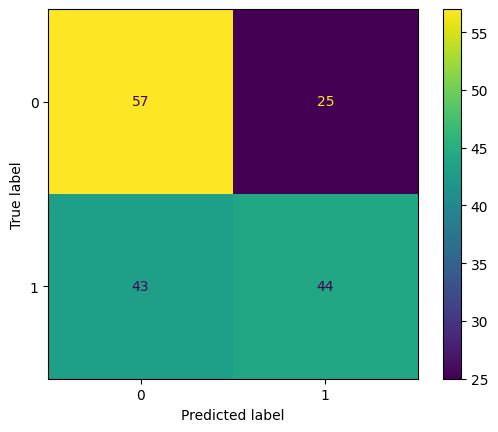

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.45      0.55      0.49        88
           1       0.37      0.28      0.32        82

    accuracy                           0.42       170
   macro avg       0.41      0.41      0.40       170
weighted avg       0.41      0.42      0.41       170


 testing period: 0.13050484657287598 



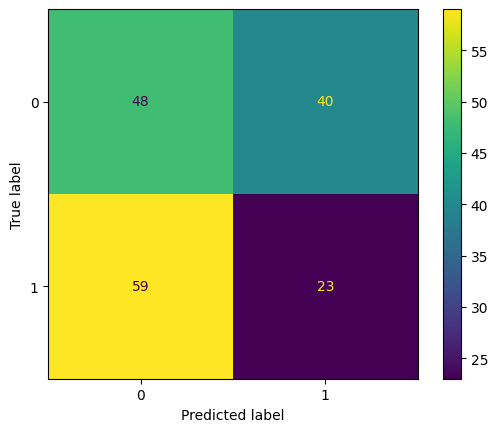

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier, LinearSVC & XGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl2 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl3 = Nws_Fkexgrb(learning_rate=0.01,n_estimators=20,subsample=0.03)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[CV 1/2; 1/2] END ..................voting=hard;, score=0.540 total time=   0.0s
[CV 2/2; 1/2] START voting=hard.................................................
[CV 2/2; 1/2] END ..................voting=hard;, score=0.620 total time=   0.0s
[CV 1/2; 2/2] START voting=soft.................................................
[CV 1/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
[CV 2/2; 2/2] START voting=soft.................................................
[CV 2/2; 2/2] END ....................voting=soft;, score=nan total time=   0.0s
Best parameters-Nws_Fke : {'voting': 'hard'}
Best Score :  0.5800000000000001



 training period: 0.1681663990020752 

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        82
           1       0.58      0.71      0.64        87

    accuracy                           0.59       169
   macro avg       0.59      0.59      0.58       169
weighted avg       0.59      0.59      0.59       169


 validation period: 0.21515345573425293 



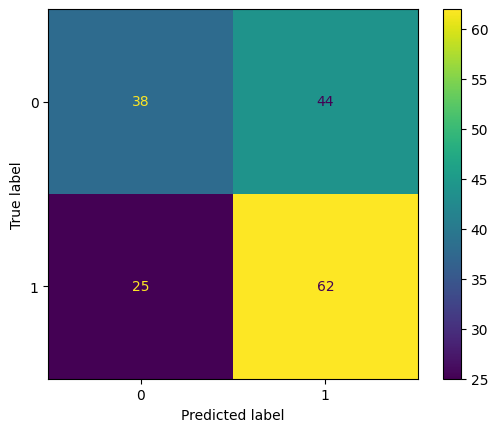

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('XGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.36      0.42        88
           1       0.46      0.59      0.52        82

    accuracy                           0.47       170
   macro avg       0.47      0.47      0.47       170
weighted avg       0.47      0.47      0.46       170


 testing period: 0.17525076866149902 



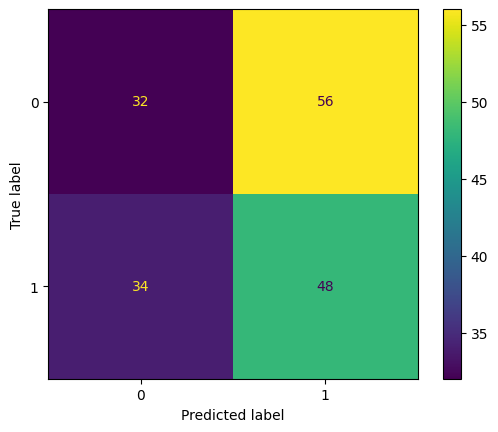

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Logistic Regression, Passive Aggressive Classifier & LightGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelst(C=3.0,penalty='l2',solver='lbfgs')

Nws_Fke_Mdl2 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl3 = Nws_Fkeligb(max_depth=3,n_estimators=10,num_leaves=2)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 1/2; 1/2] END ..................voting=hard;, score=0.560 total time=   0.1s
[CV 2/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 24, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.08909463882446289 

              precision    recall  f1-score   support

           0       0.47      0.82      0.59        82
           1       0.40      0.11      0.18        87

    accuracy                           0.46       169
   macro avg       0.43      0.47      0.39       169
weighted avg       0.43      0.46      0.38       169


 validation period: 0.07880926132202148 



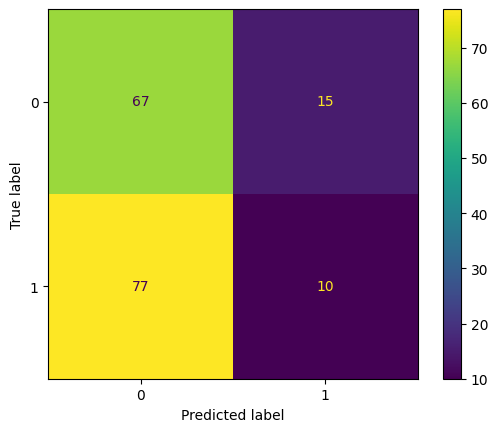

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LR', Nws_Fke_Mdl1),('PA', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.50      0.80      0.61        88
           1       0.40      0.15      0.21        82

    accuracy                           0.48       170
   macro avg       0.45      0.47      0.41       170
weighted avg       0.45      0.48      0.42       170


 testing period: 0.058777809143066406 



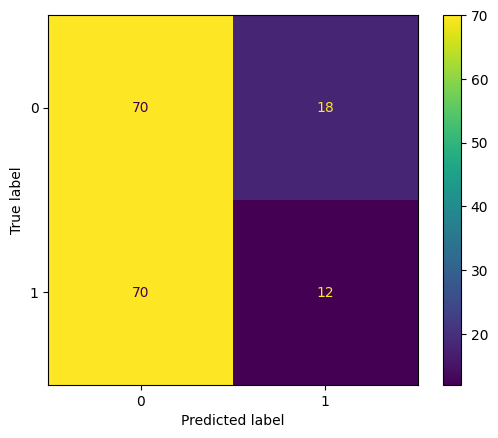

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier, LinearSVC & LightGBM

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkepvag(C=1.0,max_iter=1000,tol=0.001)

Nws_Fke_Mdl2 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl3 = Nws_Fkeligb(max_depth=3,n_estimators=10,num_leaves=2)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV 1/2; 1/2] END ..................voting=hard;, score=0.560 total time=   0.0s
[CV 2/2; 1/2] START voting=hard.................................................
[LightGBM] [Info] Number of positive: 24, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395
[LightGBM

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.10120201110839844 

              precision    recall  f1-score   support

           0       0.48      0.91      0.63        82
           1       0.50      0.08      0.14        87

    accuracy                           0.49       169
   macro avg       0.49      0.50      0.39       169
weighted avg       0.49      0.49      0.38       169


 validation period: 0.08416867256164551 



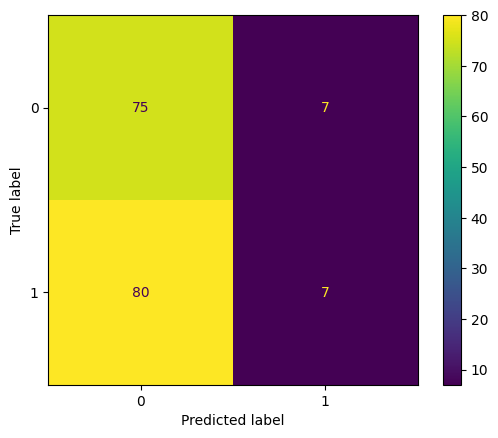

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('PA', Nws_Fke_Mdl1),('LSVC', Nws_Fke_Mdl2), ('LGB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.49      0.78      0.61        88
           1       0.37      0.13      0.20        82

    accuracy                           0.47       170
   macro avg       0.43      0.46      0.40       170
weighted avg       0.43      0.47      0.41       170


 testing period: 0.3904883861541748 



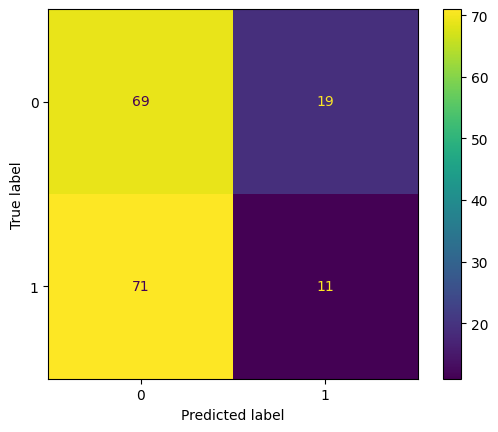

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LinearSVC, Logistic Regression & Catboost

In [ ]:
Nws_bst = {'voting': ['hard', 'soft']}

Nws_Fke_Mdl1 = Nws_Fkelisv(C=2.0,loss='squared_hinge',penalty='l2')

Nws_Fke_Mdl2 = Nws_Fkelst(C=3.0,penalty='l2',solver='lbfgs')

Nws_Fke_Mdl3 = Nws_Fkecttb(learning_rate=0.02,max_depth=3,n_estimators=20)

Nws_Fke_Mdl = Nws_Fkevtc(estimators=[('LSVC', Nws_Fke_Mdl1),('LR', Nws_Fke_Mdl2), ('CB', Nws_Fke_Mdl3)])

Nws_bst_Mdl = Nws_Fkegrs(Nws_Fke_Mdl, Nws_bst,
                         cv=2,
                         verbose=10)
Nws_bst_Mdl.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print("Best parameters-Nws_Fke :", Nws_bst_Mdl.best_params_)
print("Best Score : ", Nws_bst_Mdl.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START voting=hard.................................................
0:	learn: 0.6849753	total: 47.5ms	remaining: 902ms
1:	learn: 0.6807671	total: 48.2ms	remaining: 434ms
2:	learn: 0.6776653	total: 48.8ms	remaining: 276ms
3:	learn: 0.6744746	total: 49.7ms	remaining: 199ms
4:	learn: 0.6712920	total: 50.6ms	remaining: 152ms
5:	learn: 0.6686571	total: 51.4ms	remaining: 120ms
6:	learn: 0.6643203	total: 52.3ms	remaining: 97.2ms
7:	learn: 0.6552913	total: 53.7ms	remaining: 80.5ms
8:	learn: 0.6498971	total: 54.4ms	remaining: 66.4ms
9:	learn: 0.6474693	total: 55ms	remaining: 55ms
10:	learn: 0.6450417	total: 55.6ms	remaining: 45.5ms
11:	learn: 0.6406742	total: 56.4ms	remaining: 37.6ms
12:	learn: 0.6369182	total: 57.4ms	remaining: 30.9ms
13:	learn: 0.6324426	total: 58.2ms	remaining: 25ms
14:	learn: 0.6299441	total: 59ms	remaining: 19.7ms
15:	learn: 0.6265991	total: 59.9ms	remaining: 15ms
16:	learn: 0.6233853	total: 60.8ms	rem

0:	learn: 0.6927124	total: 1.55ms	remaining: 29.5ms
1:	learn: 0.6920490	total: 3.52ms	remaining: 31.7ms
2:	learn: 0.6916044	total: 5.05ms	remaining: 28.6ms
3:	learn: 0.6911470	total: 6.66ms	remaining: 26.6ms
4:	learn: 0.6903311	total: 8.77ms	remaining: 26.3ms
5:	learn: 0.6895718	total: 10.8ms	remaining: 25.3ms
6:	learn: 0.6892017	total: 14.1ms	remaining: 26.2ms
7:	learn: 0.6887245	total: 17.3ms	remaining: 26ms
8:	learn: 0.6881777	total: 20.3ms	remaining: 24.8ms
9:	learn: 0.6876390	total: 23.7ms	remaining: 23.7ms
10:	learn: 0.6874272	total: 26.9ms	remaining: 22ms
11:	learn: 0.6866977	total: 29.9ms	remaining: 20ms
12:	learn: 0.6863173	total: 33.1ms	remaining: 17.8ms
13:	learn: 0.6857376	total: 39.1ms	remaining: 16.8ms
14:	learn: 0.6852672	total: 42.7ms	remaining: 14.2ms
15:	learn: 0.6847508	total: 45.8ms	remaining: 11.4ms
16:	learn: 0.6840016	total: 49.2ms	remaining: 8.68ms
17:	learn: 0.6837766	total: 52.4ms	remaining: 5.82ms
18:	learn: 0.6832695	total: 55.5ms	remaining: 2.92ms
19:	learn

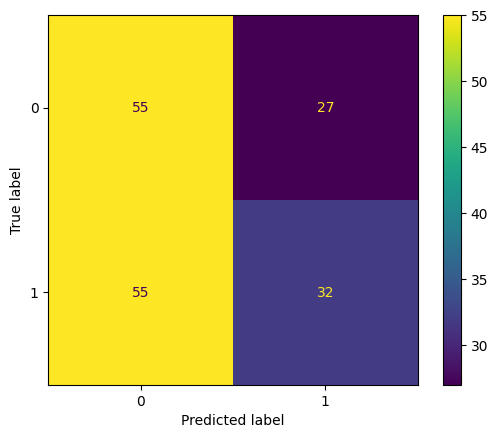

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl= Nws_Fkevtc(estimators=[('LSVC', Nws_Fke_Mdl1),('LR', Nws_Fke_Mdl2), ('CB', Nws_Fke_Mdl3)], voting='hard')
Nws_Fke_Mdl.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.66      0.56        88
           1       0.40      0.24      0.30        82

    accuracy                           0.46       170
   macro avg       0.44      0.45      0.43       170
weighted avg       0.44      0.46      0.43       170


 testing period: 0.06454992294311523 



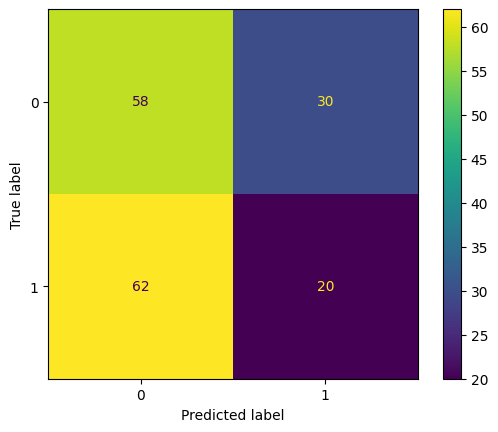

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")